In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

A very, very quick attempt at K Nearest Neighbors, just to see how that treats us.

In [2]:
df = pd.read_csv('cleaned_datasets/creatures_transformed.csv', index_col=0)

In [3]:
df.head()

,name,colors,manaValue,power,toughness,Adamant,Adapt,Afflict,Afterlife,Alliance,...,Weird,Werewolf,Whale,Wizard,Wolf,Wolverine,Worm,Wurm,Yeti,Zombie
0,Aeronaut Admiral,W,4.0,3.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Aether Inspector,W,4.0,2.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Aethergeode Miner,W,2.0,3.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Airdrop Aeronauts,W,5.0,4.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Audacious Infiltrator,W,2.0,3.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(3811, 285)

In [5]:
df.colors.unique()

array(['W', 'U', 'B', 'R', 'G', 'R, U', 'G, R', 'G, W', 'R, W', 'G, U',
       'U, W', 'B, R', 'B, G', 'C', 'B, W', 'B, U', 'G, R, W',
       'B, G, R, U, W', 'B, G, R', 'R, U, W', 'B, G, U', 'W, G',
       'G, R, U', 'B, G, W', 'B, R, W', 'G, U, W', 'B, U, W', 'B, R, U',
       'G, R, U, W'], dtype=object)

In [6]:
df['numColors'] = df.colors.str.split(', ').str.len()

In [7]:
df = df.query('numColors == 1')

In [8]:
df.colors.unique()

array(['W', 'U', 'B', 'R', 'G', 'C'], dtype=object)

In [9]:
df.drop(columns=['numColors', 'Creature'], inplace=True)

In [10]:
df.shape

(3257, 284)

#### Standardize the variables

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(df.drop(columns=['name', 'colors']))

StandardScaler()

In [14]:
scaled_features = scaler.transform(df.drop(columns=['name', 'colors']))

In [15]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[2:])

In [16]:
df_feat.head()

,manaValue,power,toughness,Adamant,Adapt,Afflict,Afterlife,Alliance,Amass,Ascend,...,Weird,Werewolf,Whale,Wizard,Wolf,Wolverine,Worm,Wurm,Yeti,Zombie
0,0.361172,0.220293,-1.145997,-0.04641,-0.049622,-0.05264,-0.04641,-0.055496,-0.049622,-0.060811,...,-0.024788,-0.175203,-0.039211,-0.246804,-0.10865,-0.024788,-0.017525,-0.072436,-0.017525,-0.220489
1,0.361172,-0.398771,0.081803,-0.04641,-0.049622,-0.05264,-0.04641,-0.055496,-0.049622,-0.060811,...,-0.024788,-0.175203,-0.039211,-0.246804,-0.10865,-0.024788,-0.017525,-0.072436,-0.017525,-0.220489
2,-0.860361,0.220293,-1.145997,-0.04641,-0.049622,-0.05264,-0.04641,-0.055496,-0.049622,-0.060811,...,-0.024788,-0.175203,-0.039211,-0.246804,-0.10865,-0.024788,-0.017525,-0.072436,-0.017525,-0.220489
3,0.971938,0.839358,0.081803,-0.04641,-0.049622,-0.05264,-0.04641,-0.055496,-0.049622,-0.060811,...,-0.024788,-0.175203,-0.039211,-0.246804,-0.10865,-0.024788,-0.017525,-0.072436,-0.017525,-0.220489
4,-0.860361,0.220293,-1.145997,-0.04641,-0.049622,-0.05264,-0.04641,-0.055496,-0.049622,-0.060811,...,-0.024788,-0.175203,-0.039211,-0.246804,-0.10865,-0.024788,-0.017525,-0.072436,-0.017525,-0.220489


#### Train-Test-Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['colors'], test_size=0.33, random_state=101)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
pred = knn.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(confusion_matrix(y_test,pred))

[[ 89   0  25  35  21  38]
 [  2  70   5   0   4   5]
 [ 17   1 123  30   3  29]
 [ 26   2  42  96   7  22]
 [ 21   4  16  19  98  25]
 [ 16   1  23  17  11 132]]


In [25]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           B       0.52      0.43      0.47       208
           C       0.90      0.81      0.85        86
           G       0.53      0.61      0.56       203
           R       0.49      0.49      0.49       195
           U       0.68      0.54      0.60       183
           W       0.53      0.66      0.59       200

    accuracy                           0.57      1075
   macro avg       0.61      0.59      0.59      1075
weighted avg       0.57      0.57      0.57      1075



#### Choosing a K Value

In [26]:
error_rate = []

for i in range(1, 60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

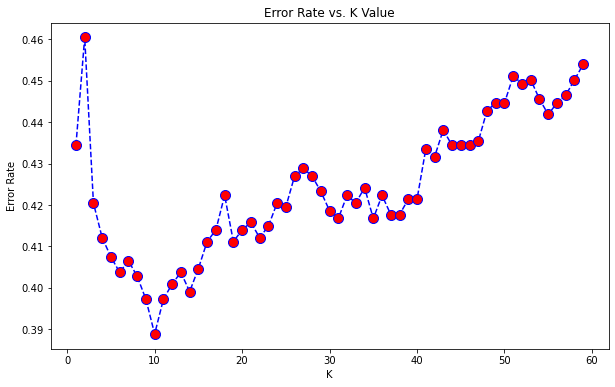

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [28]:
#K = 10
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=10


[[129   2  14  20  10  33]
 [  3  69   1   0   1  12]
 [ 17   1 120  30   4  31]
 [ 28   1  34  98  15  19]
 [ 28   4  11  13 102  25]
 [ 13   2  15  18  13 139]]


              precision    recall  f1-score   support

           B       0.59      0.62      0.61       208
           C       0.87      0.80      0.84        86
           G       0.62      0.59      0.60       203
           R       0.55      0.50      0.52       195
           U       0.70      0.56      0.62       183
           W       0.54      0.69      0.61       200

    accuracy                           0.61      1075
   macro avg       0.64      0.63      0.63      1075
weighted avg       0.62      0.61      0.61      1075



In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
minMax = MinMaxScaler()

In [31]:
minMax.fit(df.drop(columns=['name', 'colors']))

MinMaxScaler()

In [32]:
minMax_scaled_features = minMax.transform(df.drop(columns=['name', 'colors']))

In [33]:
df_min_max_feat = pd.DataFrame(minMax_scaled_features, columns=df.columns[2:])

In [34]:
df_min_max_feat.head()

,manaValue,power,toughness,Adamant,Adapt,Afflict,Afterlife,Alliance,Amass,Ascend,...,Weird,Werewolf,Whale,Wizard,Wolf,Wolverine,Worm,Wurm,Yeti,Zombie
0,0.266667,0.230769,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.266667,0.153846,0.176471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.133333,0.230769,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.333333,0.307692,0.176471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.133333,0.230769,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(minMax_scaled_features, df['colors'], test_size=0.33, random_state=101)

In [36]:
error_rate = []

for i in range(1, 60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

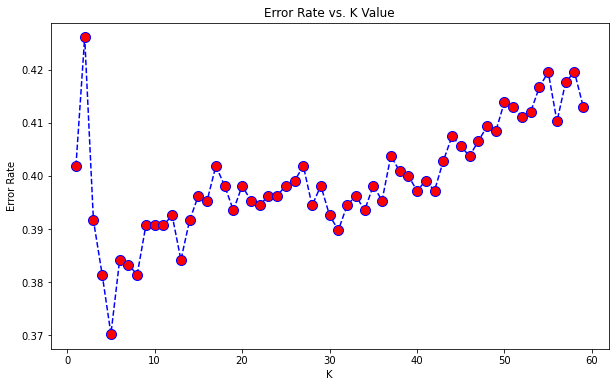

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [38]:
#K = 10
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=10


[[125   0  19  22  15  27]
 [  2  78   4   0   0   2]
 [ 12   0 136  35   4  16]
 [ 26   1  36 106  14  12]
 [ 29   4  12  17 104  17]
 [ 18   1  15  22  16 128]]


              precision    recall  f1-score   support

           B       0.59      0.60      0.60       208
           C       0.93      0.91      0.92        86
           G       0.61      0.67      0.64       203
           R       0.52      0.54      0.53       195
           U       0.68      0.57      0.62       183
           W       0.63      0.64      0.64       200

    accuracy                           0.63      1075
   macro avg       0.66      0.65      0.66      1075
weighted avg       0.63      0.63      0.63      1075



#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['colors'], test_size=0.33, random_state=101)

In [ ]:
logmodel = LogisticRegression(max_iter=2000)
logmodel.fit(X_train,y_train)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))

#### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

In [ ]:
tree_preds = dtree.predict(X_test)

In [ ]:
print(classification_report(y_test,tree_preds))

In [ ]:
print(confusion_matrix(y_test,tree_preds))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, rfc_pred))

In [ ]:
print(classification_report(y_test, rfc_pred))